In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

In [2]:
food = pd.read_csv('project_data/미식 탐방 매력도.csv', encoding='cp949')
food

,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),행정구(GU_NM),세부견인요소(KEYWORD_DETAIL),견인요소(KEYWORD),FREQ(FREQ)
0,20190403,블로그,성수동,종로구,비쥬얼,포토제닉,2
1,20190828,블로그,공릉동,성동구,인스타그램,입소문,1
2,20170329,블로그,석촌호수,서초구,식감,입소문,1
3,20191117,블로그,성수동,종로구,비쥬얼,포토제닉,1
4,20191023,블로그,정릉동,동대문구,인스타그램,포토제닉,1
...,...,...,...,...,...,...,...
495,20181013,블로그,영등포구청역,강남구,시그니처,맛,1
496,20180719,블로그,녹사평,종로구,셀카,포토제닉,1
497,20170819,블로그,홍대입구,영등포구,인스타그램,포토제닉,1
498,20180806,블로그,광화문,중구,식감,포토제닉,1


In [3]:


food.rename(columns = {'세부견인요소(KEYWORD_DETAIL)' : '세부키워드(KEYWORD_DETAIL)'}, inplace = True)

food_KN = food.groupby(food['세부키워드(KEYWORD_DETAIL)'], as_index=False)\
                .agg(keyword_n = ('세부키워드(KEYWORD_DETAIL)','count'))\
                .sort_values('keyword_n', ascending=False)\
                .head(30)
                

food_KN['키워드언급량'] = food_KN['keyword_n']
del food_KN['keyword_n']

food1 = pd.merge(left = food_KN, right = food, how = 'left', on = '세부키워드(KEYWORD_DETAIL)')

food1 = food1[['DOC_DATE(DATE)','수집소스(SOURCE)','행정구(GU_NM)','세부키워드(KEYWORD_DETAIL)','키워드언급량']]

<AxesSubplot:xlabel='키워드언급량', ylabel='세부키워드(KEYWORD_DETAIL)'>

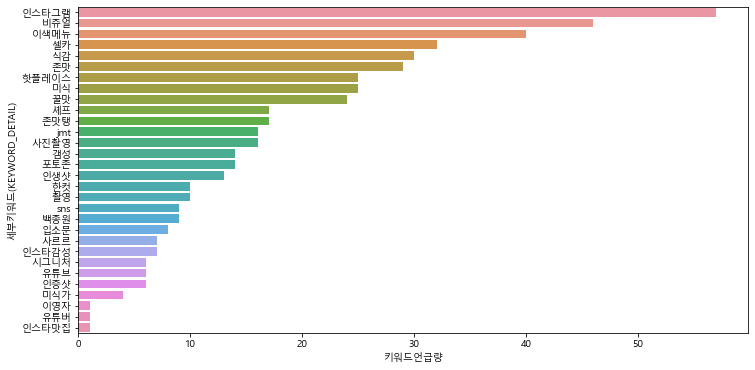

In [4]:
plt.figure(figsize = (12, 6))
sns.barplot(data = food_KN, y = '세부키워드(KEYWORD_DETAIL)', x = '키워드언급량')

In [5]:
food = pd.read_csv('project_data/미식 탐방 버즈량.csv', encoding='cp949')

In [6]:


food.rename(columns = {'세부견인요소(KEYWORD_DETAIL)' : '세부키워드(KEYWORD_DETAIL)'}, inplace = True)

food_KN = food.groupby(food['세부키워드(KEYWORD_DETAIL)'], as_index=False)\
                .agg(keyword_n = ('세부키워드(KEYWORD_DETAIL)','count'))\
                .sort_values('keyword_n', ascending=False)\
                .head(30)

food_KN['키워드언급량'] = food_KN['keyword_n']
del food_KN['keyword_n']

food1 = pd.merge(left = food_KN, right = food, how = 'left', on = '세부키워드(KEYWORD_DETAIL)')

food1 = food1[['DOC_DATE(DATE)','수집소스(SOURCE)','행정구(GU_NM)','세부키워드(KEYWORD_DETAIL)','키워드언급량']]

<AxesSubplot:xlabel='키워드언급량', ylabel='세부키워드(KEYWORD_DETAIL)'>

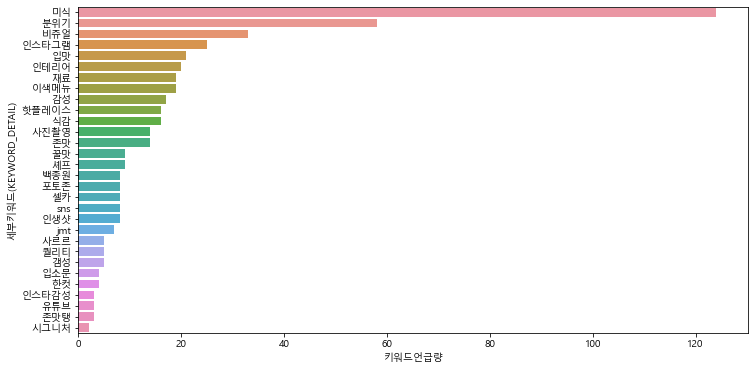

In [8]:
plt.figure(figsize = (12, 6))
sns.barplot(data = food_KN, y = '세부키워드(KEYWORD_DETAIL)', x = '키워드언급량')